# Задание 1 «Отчёт о продажах в Телеграм»

## Создадим подключения и получим базы данных 

In [ ]:
db_config = {
    'user': 'rouser', 
    'pwd': 'ZI6MVnmi', # пароль
    'host': '178.62.242.91',
    'port': 5433, # порт подключения
    'db': 'quest-db' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
from datetime import datetime, timedelta
import seaborn as sns
import math as m

In [ ]:
engine = create_engine(connection_string) 

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
query = '''
SELECT *
FROM events

'''

events = pd.read_sql_query(query, con=engine) 

events['event_id'].unique()

array(['3', '5', '4', '2', '7', '8', '12', '11', '6', '9', '10', '13'],
      dtype=object)

In [ ]:
query = '''
SELECT *
FROM events_dict 

'''

events_dict  = pd.read_sql_query(query, con=engine) 



In [ ]:
events_dict

,pk,_index,_name,id,_description
0,0,0,student_created_order,3,Создание заявки
1,1,497,student_booked_introlesson,2,Назначение ВУ
2,2,934,student_pass_introlesson_succesfully,7,Успешный ВУ
3,3,956,firstline_operator_assigned_at_task,8,Назначение задачи на звонок 1Л
4,4,1007,secondline_operator_assigned_at_task,12,Назначена задача на вторую линию
5,5,1227,student_answered_firstline_operator,4,Ученик ответил на звонок оператора 1л
6,6,1619,methodist_joined_introlesson,6,Выход МВУ на ВУ
7,7,1715,student_passed_demolesson,11,ДУ завершен
8,8,1801,student_answered_secondline_operator,9,Дозвон 2Л
9,9,2014,student_joined_demolesson,10,Переход на ДУ (ДУ начался)


In [ ]:
query = '''
SELECT *
FROM payments 

'''

payments  = pd.read_sql_query(query, con=engine) 

In [ ]:
payments 

,pk,transaction_id,transaction_created_at,_user_id,currency,amount,is_gift
0,0,3807046,2021-05-16 03:41:25,12242732,RUB,390.0,false
1,1,3807613,2021-05-16 11:06:23,12241834,RUB,7980.0,false
2,2,3807673,2021-05-16 11:33:06,12241501,RUB,24880.0,false
3,3,3810405,2021-05-17 09:45:40,12242141,RUB,8520.0,false
4,4,3811432,2021-05-17 13:35:35,12251367,RUB,14360.0,false
...,...,...,...,...,...,...,...
69798,69798,5149192,2022-03-07 13:39:19,12277154,RUB,8994.0,false
69799,69799,5189623,2022-03-13 10:40:42,12321417,RUB,8240.0,false
69800,69800,5190224,2022-03-13 12:02:43,12390963,RUB,3560.0,false
69801,69801,5190985,2022-03-13 13:26:52,12420449,RUB,390.0,false


## Изучение и предобрботка данных

На этом этапе делаем предварительный анализ данных, смотрим на качество - пропуски, аномалии.


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361688 entries, 0 to 361687
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pk           361688 non-null  object
 1   event_id     361688 non-null  object
 2   _user_id     361688 non-null  object
 3   happened_at  361688 non-null  object
dtypes: object(4)
memory usage: 11.0+ MB


В таблицы события у нас 361 тыс записей - достаточно большой объем инаофрмации, все столбцы типа object. Необходимо перевести событие с латой в формат date и вероятно, выделить месяц для удобства анализа. Пустых строй нет. На дубли проверять смысла нет - один и тот же ID может делать несколько событий

In [ ]:
events.isna().sum()

pk             0
event_id       0
_user_id       0
happened_at    0
dtype: int64

In [ ]:
events.head()

,pk,event_id,_user_id,happened_at
0,316072,3,12426747,2022-01-21 17:01:22
1,316073,3,12426754,2021-06-10 11:07:07
2,316074,3,12426754,2021-06-10 11:08:18
3,316075,3,12426779,2021-06-10 11:10:03
4,316076,3,12427176,2021-06-10 11:48:09


In [ ]:
events = events.rename(columns={'_user_id': 'user_id'})



In [ ]:


events['happened_at'] = pd.to_datetime(events['happened_at'])

In [ ]:
 

 events['month']=events['happened_at'].dt.month
 events['year']=events['happened_at'].dt.year
 events['day']=events['happened_at'].dt.day


In [ ]:
events['month'].unique()

array([ 1,  6, 10,  5,  9, 11,  7, 12,  8,  2,  3,  4])

In [ ]:
events['year'].unique()

array([2022, 2021, 2020, 2019, 2018])

Итак, у нас есть данные и событиях, совершенных пользователями с 2018 по 2022 год. Достаточно много для даже когортного анализа. и рассчета retention rate. Однако, для построения когортной модели сейчасне хватает данных. Гипотезы: когорта может быть ежедневной. И нужны доп и сследования для определения срока жизни когорты. 

Для удобства последующих действий присоединим к таблице events описание события из таблицы events_dict 

In [ ]:

events_dict = events_dict.rename(columns={'id': 'event_id', '_index': 'index', '_name': 'name', '_description': 'description'  })



In [ ]:
events_dict=events_dict.drop(columns =['pk', 'index', 'name'])

events_dict

,event_id,description
0,3,Создание заявки
1,2,Назначение ВУ
2,7,Успешный ВУ
3,8,Назначение задачи на звонок 1Л
4,12,Назначена задача на вторую линию
5,4,Ученик ответил на звонок оператора 1л
6,6,Выход МВУ на ВУ
7,11,ДУ завершен
8,9,Дозвон 2Л
9,10,Переход на ДУ (ДУ начался)


In [ ]:

events=events.merge (events_dict, on = 'event_id', how='left')
events

,pk,event_id,user_id,happened_at,month,year,day,description
0,316072,3,12426747,2022-01-21 17:01:22,1,2022,21,Создание заявки
1,316073,3,12426754,2021-06-10 11:07:07,6,2021,10,Создание заявки
2,316074,3,12426754,2021-06-10 11:08:18,6,2021,10,Создание заявки
3,316075,3,12426779,2021-06-10 11:10:03,6,2021,10,Создание заявки
4,316076,3,12427176,2021-06-10 11:48:09,6,2021,10,Создание заявки
...,...,...,...,...,...,...,...,...
361683,316067,3,12426354,2021-06-10 10:24:31,6,2021,10,Создание заявки
361684,316068,3,12426374,2021-06-10 10:26:12,6,2021,10,Создание заявки
361685,316069,3,12426407,2021-06-10 10:29:33,6,2021,10,Создание заявки
361686,316070,3,12426685,2021-06-10 10:55:31,6,2021,10,Создание заявки


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361688 entries, 0 to 361687
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   pk           361688 non-null  object        
 1   event_id     361688 non-null  object        
 2   user_id      361688 non-null  object        
 3   happened_at  361688 non-null  datetime64[ns]
 4   month        361688 non-null  int64         
 5   year         361688 non-null  int64         
 6   day          361688 non-null  int64         
 7   description  361688 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 24.8+ MB


Количество записей осталось прежним  - значит объединние произошло корректно
Теперь посмотрим на таблицу с платежами  - добавим лданные по месяцу и году платежа. Изменим тип данных для даты 

### Анализ таблицы с платежами


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69803 entries, 0 to 69802
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pk                      69803 non-null  object
 1   transaction_id          69803 non-null  object
 2   transaction_created_at  69803 non-null  object
 3   _user_id                69803 non-null  object
 4   currency                69803 non-null  object
 5   amount                  69803 non-null  object
 6   is_gift                 69803 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


In [ ]:
payments['transaction_created_at'] =pd.to_datetime(payments['transaction_created_at'])
payments['month_pt']=payments['transaction_created_at'].dt.month
payments['year_pt']=payments['transaction_created_at'].dt.year
payments['day_pt']=payments['transaction_created_at'].dt.day

Нужно перевести платежи в числовой формат


In [ ]:
payments['amount']=payments['amount'].astype('float')

payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69803 entries, 0 to 69802
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pk                      69803 non-null  object        
 1   transaction_id          69803 non-null  object        
 2   transaction_created_at  69803 non-null  datetime64[ns]
 3   _user_id                69803 non-null  object        
 4   currency                69803 non-null  object        
 5   amount                  69803 non-null  float64       
 6   is_gift                 69803 non-null  object        
 7   month_pt                69803 non-null  int64         
 8   year_pt                 69803 non-null  int64         
 9   day_pt                  69803 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 5.3+ MB


In [ ]:
payments.head(1)

,pk,transaction_id,transaction_created_at,_user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
0,0,3807046,2021-05-16 03:41:25,12242732,RUB,390.0,false,5,2021,16


In [ ]:
payments=payments.rename(columns={'_user_id':'user_id'})

In [ ]:
payments.isna().sum()

pk                        0
transaction_id            0
transaction_created_at    0
user_id                   0
currency                  0
amount                    0
is_gift                   0
month_pt                  0
year_pt                   0
day_pt                    0
dtype: int64

In [ ]:
payments['transaction_id'].duplicated().sum()

payments['pk'].duplicated().sum()

payments['user_id'].duplicated().sum()

51567

In [ ]:
payments.sort_values(by='transaction_id')

,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
38291,38291,3806509,2021-05-15 19:14:34,12241323,EUR,111.2,false,5,2021,15
13409,13409,3806579,2021-05-15 19:55:16,12241513,RUB,9040.0,true,5,2021,15
2569,2569,3806580,2021-05-15 19:55:33,12241513,RUB,9040.0,true,5,2021,15
18311,18311,3806702,2021-05-15 20:50:14,12241720,EUR,59.6,false,5,2021,15
2570,2570,3806755,2021-05-15 21:13:33,12241821,USD,222.4,false,5,2021,15
...,...,...,...,...,...,...,...,...,...,...
23412,23412,5205679,2022-03-15 11:44:16,12375528,RUB,11040.0,false,3,2022,15
58210,58210,5205681,2022-03-15 11:44:55,12463932,RUB,5960.0,false,3,2022,15
69756,69756,5205683,2022-03-15 11:45:30,12463932,RUB,5960.0,false,3,2022,15
20467,20467,5205684,2022-03-15 11:45:33,12463932,RUB,5960.0,false,3,2022,15


Вывод: есть аномалии в платежах. видим, что некоторые опльщователи проводили по несколько платежей, что было бы нормально. Сомнение вызывают ситуации, когда один и тот же платеэ сделан с разницей в несколько секунд.  51 тыс дублей user_id при обйъеме данных в 70 000 строк. Это очень много. Нужно изучить детальнее случаи дублей, для составления гипотез. 

In [ ]:
data_1 = payments.pivot_table(
    index='user_id',
    values = 'amount',
    aggfunc = 'count'
).reset_index().sort_values(by='amount', ascending = False)

data_1.head(50)

,user_id,amount
17217,12475363,234
5122,12315287,159
5132,12315396,135
2007,12272392,97
16065,12460297,85
1021,12258397,75
15169,12446919,71
17677,12482365,71
9408,12369014,67
13121,12416035,65


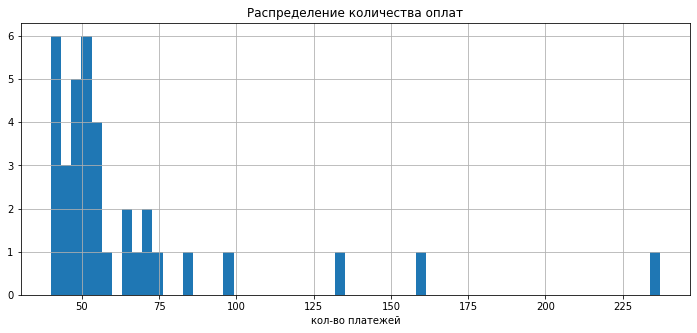

In [ ]:
data_1['amount'].hist(bins=60,figsize=(12,5),range=(40,237))

plt.xlabel('кол-во платежей')

plt.title('Распределение количества оплат')
plt.show()

Вывод: практически по каждому пользователю зафикстровано от 50 и выше оплат. Это очень странно. 
Изучим выборочно несколько пользователей, у которых около 50 оплат

In [ ]:
payments.query('user_id== "12384147"')


,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
720,720,3905317,2021-06-08 21:54:44,12384147,RUB,390.0,false,6,2021,8
848,848,3887778,2021-06-03 21:58:04,12384147,RUB,390.0,false,6,2021,3
1015,1015,3905324,2021-06-08 21:55:55,12384147,RUB,390.0,false,6,2021,8
2313,2313,3900918,2021-06-07 21:35:27,12384147,RUB,390.0,false,6,2021,7
2348,2348,3905318,2021-06-08 21:54:57,12384147,RUB,390.0,false,6,2021,8
2349,2349,3905366,2021-06-08 22:05:15,12384147,RUB,390.0,false,6,2021,8
2996,2996,3900826,2021-06-07 21:12:41,12384147,RUB,390.0,false,6,2021,7
3028,3028,3905316,2021-06-08 21:54:39,12384147,RUB,390.0,false,6,2021,8
5284,5284,3900916,2021-06-07 21:34:09,12384147,RUB,390.0,false,6,2021,7
6556,6556,3887773,2021-06-03 21:57:07,12384147,RUB,390.0,false,6,2021,3


Однозначно, что есть разные платежи. Вероятно, пользователь покупал какие-то разовые уроки, даже в рамках одного дня или месяца. Есть данные, которые подвергаются сомнению (там, где разница в платежах в 2 минуты). 

In [ ]:
test    = payments.query('year_pt==2022')

test.pivot_table(
    index = 'amount',
    values = 'user_id',
    aggfunc = 'count'
)


test.sort_values(by= 'amount' )

,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
11927,11927,4849792,2022-01-08 16:14:29,12325987,RUB,1.0,false,1,2022,8
68916,68916,5010863,2022-02-08 07:44:45,12353025,RUB,1.0,false,2,2022,8
64942,64942,5147355,2022-03-06 23:49:04,12487717,RUB,1.0,false,3,2022,6
4080,4080,5147352,2022-03-06 23:48:47,12487717,RUB,1.0,false,3,2022,6
52861,52861,4834204,2022-01-03 20:13:20,12451994,RUB,1.0,false,1,2022,3
...,...,...,...,...,...,...,...,...,...,...
37533,37533,5051101,2022-02-15 20:07:11,12315396,RUB,154000.0,false,2,2022,15
63813,63813,5051100,2022-02-15 20:07:08,12315396,RUB,154000.0,false,2,2022,15
69717,69717,5166024,2022-03-10 08:45:14,12457161,RUB,229120.0,false,3,2022,10
64364,64364,4988944,2022-02-03 16:19:10,12246425,RUB,297000.0,false,2,2022,3


Вывод: в данных о платежах есть очень странные суммы - начиная от 1 рубля и заканчивая покупками в 297 тыс р. 
Кроме того, так и не понятно, дубли ли это платежей, или нет.
Без подробного разговора с заказчиками сложно сделать однозначный вывод.
Удалять похожие платежи можно, но можно потерять значительную часть данных.
На текущем этапе проектируем метрики без удаления спорных платежей. 

In [ ]:
payments.query('user_id== "12475363"')

,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
3387,3387,4376448,2021-10-04 21:50:58,12475363,RUB,36557.0,false,10,2021,4
3421,3421,4445454,2021-10-18 22:05:06,12475363,RUB,10240.0,false,10,2021,18
3422,3422,4445728,2021-10-18 22:48:10,12475363,RUB,10240.0,false,10,2021,18
3423,3423,4445763,2021-10-18 22:53:27,12475363,RUB,10240.0,false,10,2021,18
3424,3424,4446600,2021-10-19 09:48:32,12475363,RUB,10240.0,false,10,2021,19
...,...,...,...,...,...,...,...,...,...,...
69067,69067,4445797,2021-10-18 22:58:51,12475363,RUB,10240.0,false,10,2021,18
69068,69068,4445829,2021-10-18 23:07:52,12475363,RUB,10240.0,false,10,2021,18
69069,69069,4445891,2021-10-18 23:23:52,12475363,RUB,10240.0,false,10,2021,18
69412,69412,4445582,2021-10-18 22:27:32,12475363,RUB,10240.0,false,10,2021,18


Вывод, точно, есть проблема в дублях платежей. Каким может быть ее решение? 

1. Идти к коллегам и думать над передачей действительно оплаченных заявок в БД. Иначе все теряет смысл. Нужен признак успешной транзакции. 
2. Сделать предположение, что в один день пользователь делает только 1 платеж. есть риск потерять действительные данные о тех случаях, когда пользователь делает несколько покупок
3. Оставить все как есть на данном этапе отчета. 

Есть платежи в иностранной валюте. Нужно понять насколько много таких данных. И есть ли они в 2022 году (актульаная информация для построения ежедневного отчета)


In [ ]:
payments.pivot_table(
    index= 'year_pt',
    columns='currency',
    values='amount',
    aggfunc = 'count'
)

currency,CLP,EUR,GBP,JPY,KRW,MXN,PEN,PLN,RUB,UAH,USD,UYU
year_pt,,,,,,,,,,,,
2021,15.0,4832.0,30.0,7.0,21.0,2.0,3.0,434.0,55559.0,18.0,2094.0,NaN
2022,3.0,388.0,NaN,NaN,NaN,NaN,5.0,13.0,6323.0,7.0,48.0,1.0


Вывод: информация о платежах вообще есть только начиная с 2021 года
в 2021 было достаточно разнообразный список валют

В 2022 Доля по количеству платежей в иностранной валюте почти 7%.  Доля оплат в Евро и Долларах 6%


Это достаточно существуенная доля, учитывая курс евро/доллара к рублю.

Что мы можем сделать?
1. Конвретировать значения валютные к рублю. - Возражения: нужно добавляьб онлайн курс валют (что долго и сложно)
2. Не принимать эти данные в расчет ежедневных показателей. С учетом реалий 2022 года есть ощещение, что количество валютных платеже буждет стремиться к нулю. 

Проверим вторую гипотезу - посмотим на распределение по месяцам и дням валютные платежи

In [ ]:


payments_cur = payments.loc[payments['currency']!='RUB']

payments_cur_2022 = payments_cur.query('year_pt ==2022')


In [ ]:
payments_cur_2022.pivot_table(
    index='month_pt',
    values='amount',
    aggfunc = 'count'
)

,amount
month_pt,
1,209
2,158
3,98


In [ ]:
payments_cur_2022.loc[payments_cur_2022['month_pt']==3].pivot_table(
    index='day_pt',
      values='amount',
    aggfunc = 'count'

)

,amount
day_pt,
1,15
2,15
3,8
4,5
6,3
7,5
8,7
9,5
10,11


Вывод: Мы видим, что в марте платежи в иностранной валюте были. И прекратились с 14 марта. Проверим, а есть ли платеди в рублях после 14 марта? 

In [ ]:
payments_rub = payments.loc[payments['currency']=='RUB']

payments_rub_2022 = payments_rub.query('year_pt ==2022')

payments_rub_2022.loc[payments_rub_2022['month_pt']==3].pivot_table(
    index='day_pt',
      values='transaction_created_at',
    aggfunc = 'count'

)

,transaction_created_at
day_pt,
1,101
2,90
3,113
4,67
5,69
6,60
7,85
8,62
9,196


In [ ]:
payments_rub_2022.head()

,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
3640,3640,4835326,2022-01-04 09:55:10,12484638,RUB,15440.0,false,1,2022,4
3641,3641,4837732,2022-01-04 19:33:46,12384345,RUB,14880.0,false,1,2022,4
3831,3831,4841761,2022-01-05 21:40:08,12301989,RUB,11505.0,false,1,2022,5
3833,3833,4848835,2022-01-08 11:57:57,12303366,RUB,8240.0,false,1,2022,8
3834,3834,4856280,2022-01-10 11:18:34,12446270,RUB,13800.0,false,1,2022,10


Вывод: В рублях есть информация о получении оплат вплоть до 15 марта. 
То есть гипотеза, что все платежи в иностарнной валюте обнулились и потеряди смысл не подходит. Пока еще сдишком мало данных

Что делать с валютными платежами?  - в рамках текущей задачи предлагаю пренебречь этими данными и не использовать для анализа. 
В рамках потенциальной задачи на рабочем месте - поставить задачу метода учета платежей в иностранной валюте и обсудить механизм с командой (если эти платежти актуальны) . 

## Предварительное изучение данных 

В этом разделе посмотрим на распределение данных, попробуем построить варинты воронок продаж визуально.
Все это необходимо для понимая какие 3 важные метрики мы можем вычислить из данных.

Для оперирования актуальной информацией, сделаем срез по 2022 году (с начала) 
Для ежедневного управения нужны опертивные данные, исторические оставим для фундаментального анализа

In [ ]:
events_2022 = events.query(' year ==2022')
events_2022.head(2)

events_2022['description'].unique()

array(['Создание заявки', 'Назначение ВУ',
       'Назначение задачи на звонок 1Л', 'Успешный ВУ',
       'Ученик ответил на звонок оператора 1л', 'Выход МВУ на ВУ',
       'Назначена задача на вторую линию', 'Дозвон 2Л',
       'Отправка сообщения WA', 'Переход на ДУ (ДУ начался)',
       'У ответил на сообщение WA', 'ДУ завершен'], dtype=object)

У нас идет продажа пакетов уроков - мы видим достаточно большой разброс а суммах платежей. 



Вспомогательные события (второстепенные) - не учитываем для дальнейшего анализа: 

Назначена задача на вторую линию’,
'Выход МВУ на ВУ’,
'Ученик ответил на звонок оператора 1л',
'Назначение задачи на звонок 1Л’, 
'Дозвон 2Л’, 
'Отправка сообщения WA', '
'У ответил на сообщение WA'


'Создание заявки’, - шаг 1 

'Назначение ВУ’, - шаг 2 
 ДУ завершен’,  - шаг 3 

'Успешный ВУ’, 


Без дальнейшего полного общения с заказчиком может возникнуть путаница в данных воронки, не ясно - что занчит "успешный ВУ" и каков аналогичный статус для ДУ? Значит ли, что сделака состоялась?

Посмотрим на объем входящих заявок - как на однозначно верхний уровень воронки. "Создание заявки" 
       

In [ ]:
events_2022_create_order =events_2022.query ('description == "Создание заявки" ')

table_1m = events_2022_create_order.query('month==1').pivot_table(
    index = 'day',
    values = 'user_id',
    aggfunc = 'count'
).reset_index()

table_2m = events_2022_create_order.query('month==2').pivot_table(
    index = 'day',
    values = 'user_id',
    aggfunc = 'count'
).reset_index()


table_3m = events_2022_create_order.query('month==3').pivot_table(
    index = 'day',
    values = 'user_id',
    aggfunc = 'count'
).reset_index()

table_3m

,day,user_id
0,1,51
1,2,45
2,3,53
3,4,27
4,5,34
5,6,18
6,7,27
7,8,29
8,9,38
9,10,41


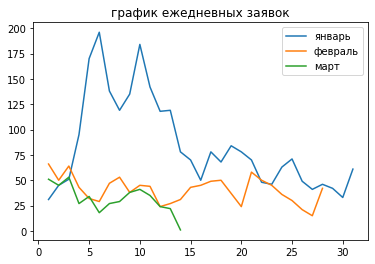

In [ ]:
plt.plot(table_1m['day'], table_1m['user_id'], label='январь')
plt.plot(table_2m['day'], table_2m['user_id'], label='февраль')
plt.plot(table_3m['day'], table_3m['user_id'], label='март')

plt.title ('график ежедневных заявок')
plt.legend() 

Вывод: итак, в январе мы виим всплеск входящих заявок во время каникул , после каникул динамика входящих заявок примерно в одном тренде. Тем не менее, количество входящих заявок важный показатель, который позволяет котнролировать верхний уровень воронки. Таким образом. первая метрика - График ежедневных заявок за текущи месяц

UPD: пока не знаю, как запрогать подмену менсяца на текущий последний (для автомотизации отчета) Оставляю пока ручную правку ежемесячную кода. 

**Далее поработаем с данными по платежам. Посмотрим что может быть полезным для ежедневного *управления* **

построим аналогичные сумме платежей

In [ ]:

payment_1m = payments_rub_2022.query('month_pt==1').pivot_table(
    index = 'day_pt',
    values = 'amount',
    aggfunc = 'sum'
).reset_index()



payment_2m = payments_rub_2022.query('month_pt==2').pivot_table(
    index = 'day_pt',
    values = 'amount',
    aggfunc = 'sum'
).reset_index()


payment_3m = payments_rub_2022.query('month_pt==3').pivot_table(
    index = 'day_pt',
    values = 'amount',
    aggfunc = 'sum'
).reset_index()


payment_3m.head(5)

,day_pt,amount
0,1,1393947.0
1,2,1108858.0
2,3,1464322.0
3,4,1745068.0
4,5,887964.0


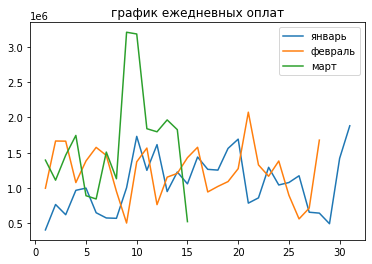

In [ ]:
plt.plot(payment_1m['day_pt'], payment_1m['amount'], label='январь')
plt.plot(payment_2m['day_pt'], payment_2m['amount'], label='февраль')
plt.plot(payment_3m['day_pt'], payment_3m['amount'], label='март')

plt.title ('график ежедневных оплат')
plt.legend() 


Вывод: В целом, месяц к месяцу  ежедневная сумма оплат имеет схожую динамику, кроме всплеска оеоло 10 марта, однако пока этот график не самый показательный. 

Посомтрим на количество оплаченных заявок и на средний чек - это декомпозиция суммы оплат.


### Количество оплаченных заявок

In [ ]:
order_1m = payments_rub_2022.query('month_pt==1').pivot_table(
    index = 'day_pt',
    values = 'amount',
    aggfunc = 'count'
).reset_index()



order_2m = payments_rub_2022.query('month_pt==2').pivot_table(
    index = 'day_pt',
    values = 'amount',
    aggfunc = 'count'
).reset_index()


order_3m = payments_rub_2022.query('month_pt==3').pivot_table(
    index = 'day_pt',
    values = 'amount',
    aggfunc = 'count'
).reset_index()


order_3m





,day_pt,amount
0,1,101
1,2,90
2,3,113
3,4,67
4,5,69
5,6,60
6,7,85
7,8,62
8,9,196
9,10,181


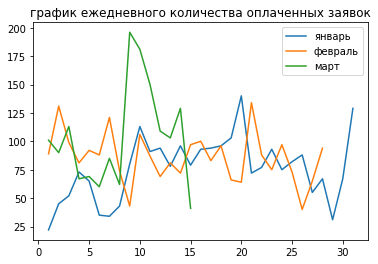

In [ ]:
plt.plot(order_1m['day_pt'], order_1m['amount'], label='январь')
plt.plot(order_2m['day_pt'], order_2m['amount'], label='февраль')
plt.plot(order_3m['day_pt'], order_3m['amount'], label='март')

plt.title ('график ежедневного количества оплаченных заявок')
plt.legend() 

### Средний чек

In [ ]:
payments_rub_2022.head()

,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
3640,3640,4835326,2022-01-04 09:55:10,12484638,RUB,15440.0,false,1,2022,4
3641,3641,4837732,2022-01-04 19:33:46,12384345,RUB,14880.0,false,1,2022,4
3831,3831,4841761,2022-01-05 21:40:08,12301989,RUB,11505.0,false,1,2022,5
3833,3833,4848835,2022-01-08 11:57:57,12303366,RUB,8240.0,false,1,2022,8
3834,3834,4856280,2022-01-10 11:18:34,12446270,RUB,13800.0,false,1,2022,10


In [ ]:
avg_chek_1 = payments_rub_2022.query('month_pt==1').groupby('day_pt').agg({'amount':'sum','transaction_id':'count'}).reset_index()

avg_chek_1['avg_chek'] = (avg_chek_1['amount']/avg_chek_1['transaction_id'])

avg_chek_1.head()

,day_pt,amount,transaction_id,avg_chek
0,1,401541.0,22,18251.863636
1,2,762857.0,45,16952.377778
2,3,617624.0,52,11877.384615
3,4,964572.0,73,13213.315068
4,5,995883.0,65,15321.276923


In [ ]:
avg_chek_2 = payments_rub_2022.query('month_pt==2').groupby('day_pt').agg({'amount':'sum','transaction_id':'count'}).reset_index()
avg_chek_2['avg_chek'] = avg_chek_2['amount']/avg_chek_2['transaction_id']


In [ ]:
avg_chek_3 = payments_rub_2022.query('month_pt==3').groupby('day_pt').agg({'amount':'sum','transaction_id':'count'}).reset_index()
avg_chek_3['avg_chek'] = avg_chek_3['amount']/avg_chek_3['transaction_id']


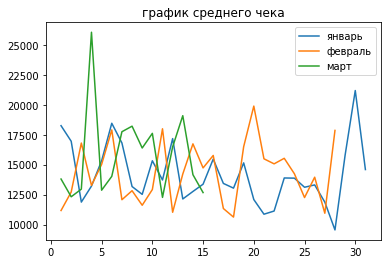

In [ ]:
plt.plot(avg_chek_1['day_pt'], avg_chek_1['avg_chek'], label='январь')
plt.plot(avg_chek_2['day_pt'], avg_chek_2['avg_chek'], label='февраль')
plt.plot(avg_chek_3['day_pt'], avg_chek_3['avg_chek'], label='март')

plt.title ('график среднего чека')
plt.legend() 

# Финальные метрики


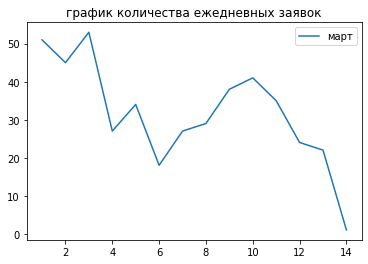

In [ ]:
#первая метрика в отчет
plt.plot(table_3m['day'], table_3m['user_id'], label='март')

plt.title ('график количества ежедневных заявок')
#plt.set_xlabel('день месяца')
#plt.set_ylabel('количество заявок')
plt.legend() 

In [ ]:

dt = datetime(events['happened_at'].max().year, events['happened_at'].max().month, events['happened_at'].max().day)


metrika_1 = events.loc[events['happened_at']>= dt ].query('description == "Создание заявки"')['description'].count()
metrika_1



1

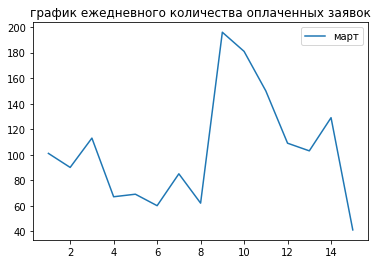

In [ ]:
# Вторая  метрика в отчет
plt.plot(order_3m['day_pt'], order_3m['amount'], label='март')

plt.title ('график ежедневного количества оплаченных заявок')
plt.legend() 


In [ ]:


dt2  = datetime (payments['transaction_created_at'].max().year,payments['transaction_created_at'].max().month,payments['transaction_created_at'].max().day)
metrika_2 = payments_rub_2022.loc[payments_rub_2022['transaction_created_at']>=dt2 ]['transaction_created_at'].count()

metrika_2



41

In [ ]:
payments.head(1)

,pk,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,month_pt,year_pt,day_pt
0,0,3807046,2021-05-16 03:41:25,12242732,RUB,390.0,false,5,2021,16


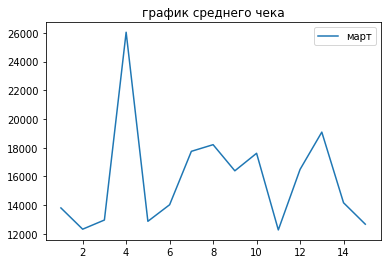

In [ ]:
# третья метрика в отчет

plt.plot(avg_chek_3['day_pt'], avg_chek_3['avg_chek'], label='март')

plt.title ('график среднего чека')
plt.legend() 

In [ ]:
dt2  = datetime (payments['transaction_created_at'].max().year,payments['transaction_created_at'].max().month,payments['transaction_created_at'].max().day)
avg = payments_rub_2022.loc[payments_rub_2022['transaction_created_at']>=dt2 ]['amount'].sum()
count = payments_rub_2022.loc[payments_rub_2022['transaction_created_at']>=dt2 ]['amount'].count()

metrika_3 = avg/count

metrika_3  = format(metrika_3, '.0f')

metrika_3


'12669'

#Создание телеграм бота

In [ ]:
#dependencies
!pip install pytelegrambotapi asyncio aioschedule aiohttp

In [ ]:

# impport libs
import asyncio, aioschedule
import telebot, time, re
from telebot import types
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from telebot.async_telebot import AsyncTeleBot

# telegram bot unique token
API_TOKEN = '5280542415:AAEpFnFlDA1VV39NetvTQbNtxtT4BZymRMs'

# bot object
bot = AsyncTeleBot(API_TOKEN)

# main func for report
async def make_report(chat_id) -> None:

  #1
    await bot.send_message(chat_id, text='график количества ежедневных заявок');
  
    plt.plot(table_3m['day'], table_3m['user_id'], label='март')
    plt.title ('график количества ежедневных заявок')
    plt.legend() 
    plt.savefig('./foo.png')
    plt.close()
    pic = Image.open('./foo.png')
    await bot.send_photo(chat_id, pic)

    await bot.send_message(chat_id, text='количество заявок за вчера ' + str(metrika_1));
    
#2
    
    await bot.send_message(chat_id, 'Метрика 2')
    y = np.random.rand(1,31)
    plt.plot(y[0])
    plt.savefig('./foo.png')
    plt.close()
    pic = Image.open('./foo.png')
    await bot.send_photo(chat_id, pic)

    await bot.send_message(chat_id, text='количество оплаченных заявок ' + str(metrika_2))
#3
    await bot.send_message(chat_id, 'Метрика 3')
    y = np.random.rand(1,31)
    plt.plot(y[0])
    plt.savefig('./foo.png')
    plt.close()
    pic = Image.open('./foo.png')
    await bot.send_photo(chat_id, pic)
    #aioschedule.clear(chat_id)  # return schedule.CancelJob not working in aioschedule use tag for delete
    await bot.send_message(chat_id, text='средний чек ' + str(metrika_3))


# handlers
@bot.message_handler(commands=['start'])
async def send_welcome(message):
    await bot.reply_to(message, "Привет, я буду ежедневно отправлять тебе 3 метрики \n" +
                       "Выбери время командой /dailynews_time\n"+
                       "Формат времни часы:минуты, например 8:00 (или можно указать только часы, например 8)")
        #await bot.reply_to(message, "Выбери время командой /dailynews_time")
        
@bot.message_handler(commands=['help'])
async def send_welcome(message):
    await bot.reply_to(message, " Всего две команды - установить регулярные сообщения (/dailynews_time) и отменить (/unset)" +
                       "/dailynews_time можно сделать несколько - поставить на 8 утра и на 4 вечера"+
                       "/unset убирает все настройки расписания")

@bot.message_handler(commands=['dailynews_time'])
async def set_timer(message):
    args = re.split(' |:',message.text)
    if len(args) == 2 and args[1].isdigit():
        # for test send schedule every seconds
        #sec = int(args[1])
        #aioschedule.every(sec).seconds.do(make_report, message.chat.id).tag(message.chat.id)
        # for daily
        dailytime = args[0] + ':00'
        aioschedule.every().day.at(dailytime).do(make_report, message.chat.id).tag(message.chat.id)   
        await bot.send_message(message.chat.id, text='добавлено расписание ' + dailytime)
    elif len(args) == 3 and args[1].isdigit() and args[2].isdigit():
        dailytime = args[1] + ':' + args[2]
        aioschedule.every().day.at(dailytime).do(make_report, message.chat.id).tag(message.chat.id)   
        await bot.send_message(message.chat.id, text='добавлено расписание ' + dailytime)
    else:
        await bot.reply_to(message, "Формат времни часы:минуты, например 8:00 (или можно указать только часы, например 8)")


@bot.message_handler(commands=['unset'])
def unset_timer(message):
    aioschedule.clear(message.chat.id)
    bot.send_message(message.chat.id, text='Расписание очищено')

@bot.message_handler(commands=['test'])
async def test_make_report(message):
    await bot.send_message(message.chat.id, text='TEST')
    make_report(message)

# 
async def scheduler():
    while True:
        await aioschedule.run_pending()
        await asyncio.sleep(2)


# start script
asyncio.gather(bot.infinity_polling(), scheduler())

In [ ]:
from datetime import datetime
datetime.now()


datetime.datetime(2022, 3, 27, 16, 35, 37, 920709)